# Mode Imputation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [3]:
df.sample(10)

,FireplaceQu,GarageQual,SalePrice
1265,NaN,TA,183900
518,NaN,TA,211000
534,Gd,TA,178000
983,Gd,TA,255900
453,NaN,TA,210000
45,Gd,TA,319900
390,NaN,TA,119000
7,TA,TA,200000
981,TA,TA,336000
1203,TA,TA,213000


### Checking missing (NULL) value

In [4]:
(df.isnull().mean()*100).round(2)

FireplaceQu    47.26
GarageQual      5.55
SalePrice       0.00
dtype: float64

### Plotting Bar Garage Value

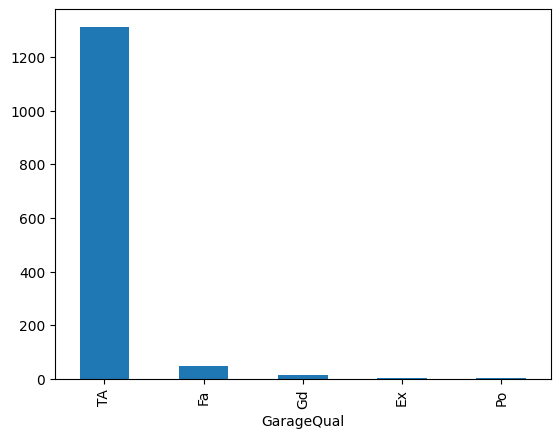

In [5]:
df['GarageQual'].value_counts().plot(kind = 'bar')
plt.show()

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

### KDE plot | Comparing Houses with TA / NULL

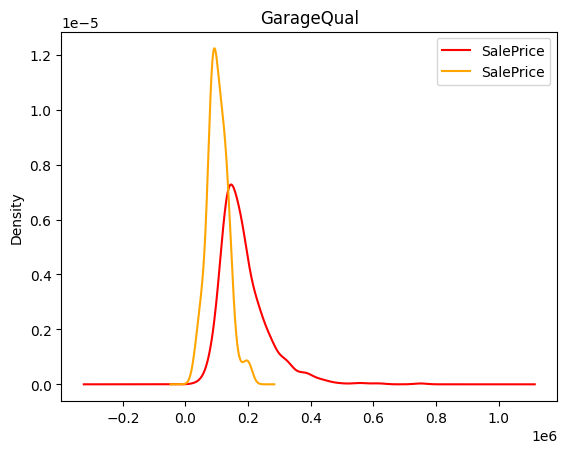

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', color = 'red', ax = ax, legend = True)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', color = 'orange', ax = ax, legend = True)   
plt.title('GarageQual')
plt.show()

### Storing variable TA in temp

In [8]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

### Replacing missing values with TA

In [9]:
df['GarageQual'].fillna('TA', inplace = True)

### Reviewing the changes in TA after imputation

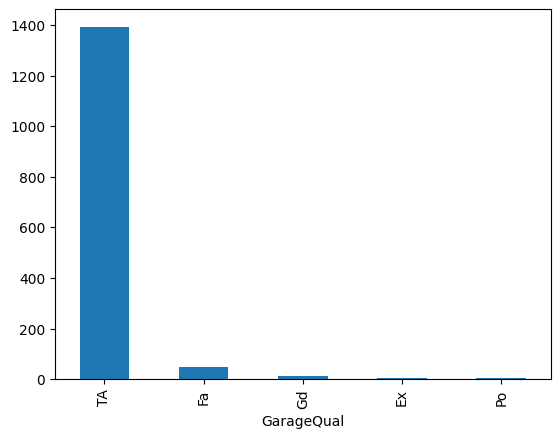

In [10]:
df['GarageQual'].value_counts().plot(kind = 'bar')
plt.show()

### KDE plot after imputaion

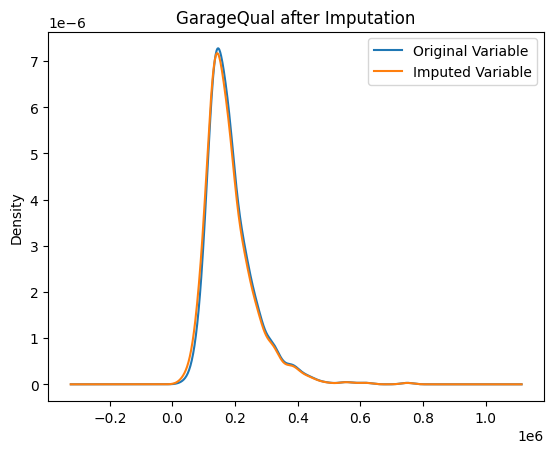

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot.density(ax = ax, legend = True, label= 'Original Variable')
df[df['GarageQual'] == 'TA']['SalePrice'].plot.density(ax= ax, legend = True, label = 'Imputed Variable')
plt.title('GarageQual after Imputation')
plt.show()

### Plot Bar Fire Place

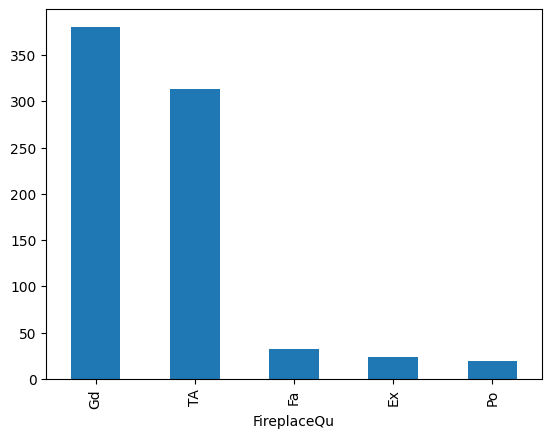

0    Gd
Name: FireplaceQu, dtype: object

In [12]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')
plt.show()
df['FireplaceQu'].mode()

### KDE Plot House with GD and NA

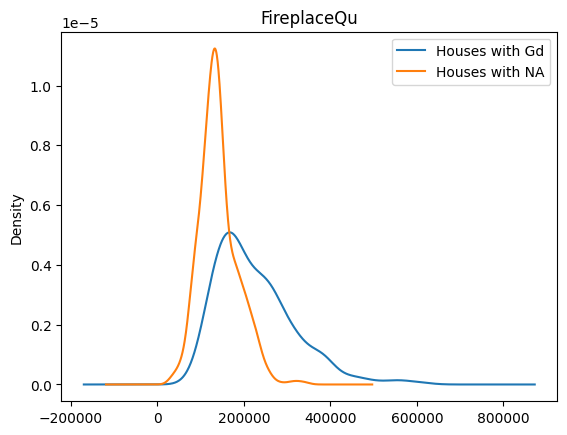

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu']== 'Gd']['SalePrice'].plot.density(ax = ax, label = 'Houses with Gd', legend = True)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot.density(ax = ax, label = 'Houses with NA', legend = True)
plt.title('FireplaceQu')
plt.show()

### Storing in temp

In [14]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

### Replacing Null values

In [15]:
df['FireplaceQu'].fillna('Gd', inplace = True)

### Barplot to show changes after imputaion 


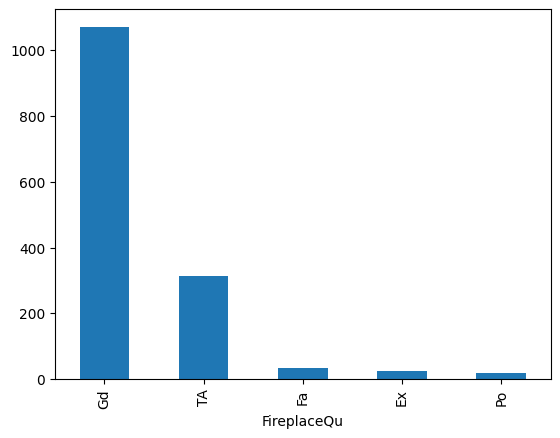

In [16]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')
plt.show()

### KDE plot after imputation

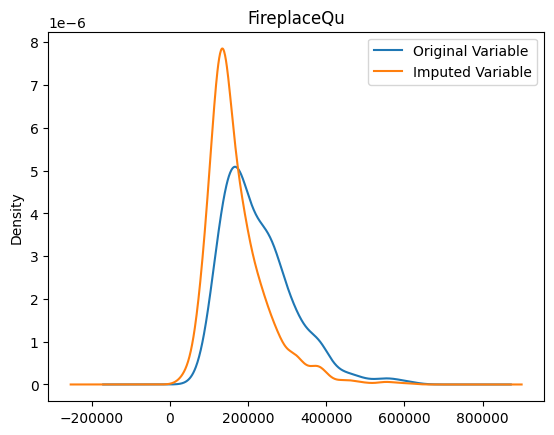

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot.density(ax= ax, legend = True, label = 'Original Variable')
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot.density(ax = ax, legend = True, label = 'Imputed Variable')
plt.title('FireplaceQu')
plt.show()